# Importing Libraries

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Loading Data

In [33]:
os.chdir('C:\\Users\\Avita\\OneDrive\\Desktop\\Capstone Project\\Airbnb')

In [34]:
df=pd.read_csv('data1.csv')

In [35]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


# Checking Data 

In [36]:
df.shape

(48895, 16)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [38]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [39]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# Data Cleaning 

In [40]:
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [41]:
df['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

In [42]:
df.drop(columns=['id','name','host_id','host_name','neighbourhood','last_review'],inplace=True)

In [43]:
## Drop these columns because they do not help in clustering or segmenation of data and gives any valuable insights

In [44]:
df

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,40.67853,-73.94995,Private room,70,2,0,NaN,2,9
48891,Brooklyn,40.70184,-73.93317,Private room,40,4,0,NaN,2,36
48892,Manhattan,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27
48893,Manhattan,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2


In [45]:
df.isnull().sum()/len(df)*100

neighbourhood_group                0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [46]:
df['reviews_per_month']=df['reviews_per_month'].fillna(0)

In [47]:
df.isnull().sum()

neighbourhood_group               0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [48]:
## Null value treated

In [49]:
df['price'].agg(['min','max','mean'])

min         0.000000
max     10000.000000
mean      152.720687
Name: price, dtype: float64

In [50]:
df = df[df['price'] <= 1000]  
df = df[df['price'] > 0]

In [51]:
## Here we see price is as low as 0 and as high as 10000 which seems to be incorrect and outliers so to help in making clustering we remove extreme reanges

In [52]:
df['price'].agg(['min','max','mean'])

min       10.000000
max     1000.000000
mean     141.311789
Name: price, dtype: float64

In [53]:
## Outlier Treated

# Encoding 

In [55]:
df_encoded = pd.get_dummies(df, columns=['neighbourhood_group', 'room_type'], drop_first=True)

In [56]:
df_encoded = df_encoded.astype(int)

In [57]:
df_encoded

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,40,-73,149,1,9,0,6,365,1,0,0,0,1,0
1,40,-73,225,1,45,0,2,355,0,1,0,0,0,0
2,40,-73,150,3,0,0,1,365,0,1,0,0,1,0
3,40,-73,89,1,270,4,1,194,1,0,0,0,0,0
4,40,-73,80,10,9,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,40,-73,70,2,0,0,2,9,1,0,0,0,1,0
48891,40,-73,40,4,0,0,2,36,1,0,0,0,1,0
48892,40,-73,115,10,0,0,1,27,0,1,0,0,0,0
48893,40,-73,55,1,0,0,6,2,0,1,0,0,0,1


In [58]:
df_model = df_encoded.copy()

In [59]:
df_model

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,40,-73,149,1,9,0,6,365,1,0,0,0,1,0
1,40,-73,225,1,45,0,2,355,0,1,0,0,0,0
2,40,-73,150,3,0,0,1,365,0,1,0,0,1,0
3,40,-73,89,1,270,4,1,194,1,0,0,0,0,0
4,40,-73,80,10,9,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,40,-73,70,2,0,0,2,9,1,0,0,0,1,0
48891,40,-73,40,4,0,0,2,36,1,0,0,0,1,0
48892,40,-73,115,10,0,0,1,27,0,1,0,0,0,0
48893,40,-73,55,1,0,0,6,2,0,1,0,0,0,1


In [60]:
ss = StandardScaler()
scaled_df = ss.fit_transform(df_encoded)

In [61]:
scaled_df=pd.DataFrame(scaled_df)
scaled_df.columns=df_encoded.columns

In [62]:
scaled_df

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,0.0,0.280192,0.065863,-0.294737,-0.321636,-0.537656,-0.035201,1.921558,1.194686,-0.889523,-0.362724,-0.087666,1.088133,-0.156021
1,0.0,0.280192,0.716938,-0.294737,0.484983,-0.537656,-0.156316,1.845474,-0.837040,1.124198,-0.362724,-0.087666,-0.919005,-0.156021
2,0.0,0.280192,0.074430,-0.196055,-0.523290,-0.537656,-0.186595,1.921558,-0.837040,1.124198,-0.362724,-0.087666,1.088133,-0.156021
3,0.0,0.280192,-0.448143,-0.294737,5.526353,2.120029,-0.186595,0.620520,1.194686,-0.889523,-0.362724,-0.087666,-0.919005,-0.156021
4,0.0,0.280192,-0.525244,0.149333,-0.321636,-0.537656,-0.186595,-0.855512,-0.837040,1.124198,-0.362724,-0.087666,-0.919005,-0.156021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48640,0.0,0.280192,-0.610912,-0.245396,-0.523290,-0.537656,-0.156316,-0.787037,1.194686,-0.889523,-0.362724,-0.087666,1.088133,-0.156021
48641,0.0,0.280192,-0.867915,-0.146714,-0.523290,-0.537656,-0.156316,-0.581609,1.194686,-0.889523,-0.362724,-0.087666,1.088133,-0.156021
48642,0.0,0.280192,-0.225407,0.149333,-0.523290,-0.537656,-0.186595,-0.650085,-0.837040,1.124198,-0.362724,-0.087666,-0.919005,-0.156021
48643,0.0,0.280192,-0.739413,-0.294737,-0.523290,-0.537656,-0.035201,-0.840295,-0.837040,1.124198,-0.362724,-0.087666,-0.919005,6.409403


## K means

In [101]:
inertia = []
k_range = range(1, 11)  

for k in k_range:
    km = KMeans(n_clusters=k, random_state=54)
    km.fit(scaled_df)
    inertia.append(km.inertia_)  

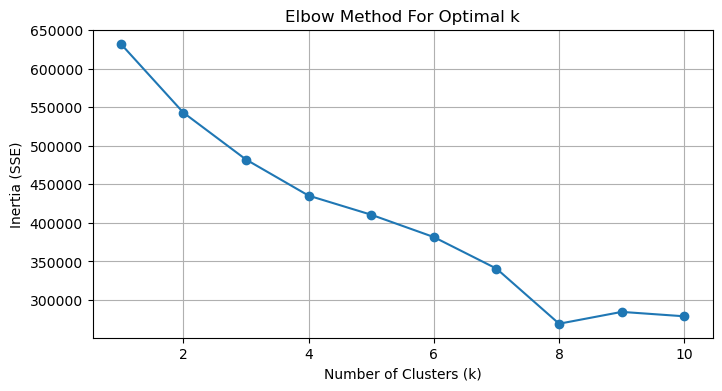

In [102]:
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method For Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (SSE)")
plt.grid(True)
plt.show()

In [103]:
km = KMeans(n_clusters=5,random_state=42)
kmeans_labels = km.fit_predict(scaled_df)

In [104]:
df_model['kmeans_cluster'] = kmeans_labels

In [105]:
df_model

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room,kmeans_cluster
0,40,-73,149,1,9,0,6,365,1,0,0,0,1,0,0
1,40,-73,225,1,45,0,2,355,0,1,0,0,0,0,1
2,40,-73,150,3,0,0,1,365,0,1,0,0,1,0,1
3,40,-73,89,1,270,4,1,194,1,0,0,0,0,0,2
4,40,-73,80,10,9,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,40,-73,70,2,0,0,2,9,1,0,0,0,1,0,0
48891,40,-73,40,4,0,0,2,36,1,0,0,0,1,0,0
48892,40,-73,115,10,0,0,1,27,0,1,0,0,0,0,1
48893,40,-73,55,1,0,0,6,2,0,1,0,0,0,1,1


In [106]:
print(df_model['kmeans_cluster'].value_counts().sort_index())

df_model.groupby('kmeans_cluster').mean().round(2)

kmeans_cluster
0    18783
1    19650
2     4455
3     5386
4      371
Name: count, dtype: int64


,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
kmeans_cluster,,,,,,,,,,,,,,
0,40.0,-73.03,114.67,6.21,12.96,0.46,2.30,94.14,0.96,0.00,0.00,0.0,0.52,0.02
1,40.0,-73.12,184.33,9.23,11.04,0.41,13.88,107.91,0.00,0.99,0.00,0.0,0.35,0.02
2,40.0,-73.03,122.81,2.52,125.33,3.80,2.05,166.70,0.45,0.44,0.06,0.0,0.49,0.02
3,40.0,-73.00,95.51,5.21,19.65,0.97,4.15,141.92,0.00,0.00,1.00,0.0,0.60,0.04
4,40.0,-74.00,98.58,4.82,31.11,1.22,2.33,199.77,0.00,0.00,0.00,1.0,0.51,0.02


# Summary 

## 🔍 K-Means Clustering Summary (k = 5)

We applied **K-Means clustering (k = 5)** on the preprocessed and scaled New York Airbnb dataset to segment listings based on key numerical and categorical features such as `price`, `room type`, `neighbourhood group`, `availability_365`, and review activity.

After evaluating the **Elbow Method**, we selected **5 clusters** as optimal based on the inertia curve. Below is the interpretation of each cluster:

---

### 🟩 Cluster 0 – Budget Stays in Brooklyn (52% Private Rooms)
- **Size**: 18,783 listings  
- **Average Price**: ~$114  
- **Location**: ~96% in **Brooklyn**  
- **Room Type**: Mix of private rooms (52%) and entire homes  
- **Minimum Nights**: 6.2  
- **Insights**: Popular for moderate-length stays in Brooklyn, with mid-level pricing and good availability. Likely targets budget-conscious travelers looking for value stays.

---

### 🟦 Cluster 1 – High-End Apartments in Manhattan
- **Size**: 19,650 listings  
- **Average Price**: ~$184  
- **Location**: 99% in **Manhattan**  
- **Room Type**: Mostly entire homes/apartments (~65%)  
- **Minimum Nights**: 9.2  
- **Insights**: Premium listings targeting business travelers or tourists who prefer full privacy and central access. Longer stay durations indicate well-furnished, possibly luxury spaces.

---

### 🟨 Cluster 2 – High-Review, Short-Stay Budget Listings
- **Size**: 4,455 listings  
- **Average Price**: ~$122  
- **Room Type**: ~49% private rooms  
- **Reviews**: Highest reviews per month (3.8) and total reviews (~125)  
- **Minimum Nights**: 2.5  
- **Insights**: Very active listings with short stays and high turnover. Likely optimized for solo travelers or short-term tourists. Strong presence in both Brooklyn and Manhattan.

---

### 🟪 Cluster 3 – Budget Listings in Queens (60% Private Rooms)
- **Size**: 5,386 listings  
- **Average Price**: ~$95  
- **Location**: 100% in **Queens**  
- **Room Type**: 60% private rooms  
- **Availability**: ~142 days/year  
- **Insights**: Affordable, longer-availability stays in Queens. Potentially more residential and less touristy, ideal for families or students on a budget.

---

### 🟥 Cluster 4 – Low-Volume Listings in Staten Island
- **Size**: 371 listings  
- **Average Price**: ~$98  
- **Location**: 100% in **Staten Island**  
- **Room Type**: ~51% private rooms  
- **Insights**: Very small and isolated cluster. May include outliers or serve niche travelers. Useful for detecting geographic or demand-based anomalies.

---

## 📌 Overall Insight

K-Means clustering successfully segmented Airbnb listings into **business-meaningful clusters** based on pricing, location, room type, and review patterns. These insights can assist platforms like Airbnb in crafting personalized strategies for marketing, pricing, and city-specific engagement.

